<a href="https://colab.research.google.com/github/melnotte/data-science-specialization/blob/main/condominium_management_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHASE 1

**Project Challenge 2: Condominium Management**

Managing condominiums is a task that requires a great deal of attention and organization. Among the various management responsibilities is collecting rent from tenants. To guarantee the good financial health of the company, it is essential that these payments are made regularly and on time. However, we know that this does not always happen.

The objective is to analyze the delay in rent payments for some condominium residents. We will use the **condominium-mgmt.json** database, which contains information about the tenants' apartments, the agreed day for rent payment, the day the payment is actually made, and the rent amount.

In [305]:
import pandas as pd
import json
import numpy as np

In [306]:
data = pd.read_json('condominium-mgmt.json')

In [307]:
data.head()

,dados_locacao
0,"{'apartamento': 'A101 (blocoAP)', 'datas_combi..."
1,"{'apartamento': 'A102 (blocoAP)', 'datas_combi..."
2,"{'apartamento': 'B201 (blocoAP)', 'datas_combi..."
3,"{'apartamento': 'B202 (blocoAP)', 'datas_combi..."
4,"{'apartamento': 'C301 (blocoAP)', 'datas_combi..."


In [308]:
data = pd.json_normalize(data['dados_locacao'])

In [309]:
data

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),"[01/06/2022, 01/07/2022]","[05/06/2022, 03/07/2022]","[$ 1000,0 reais, $ 2500,0 reais]"
1,A102 (blocoAP),"[02/06/2022, 02/07/2022]","[02/06/2022, 06/07/2022]","[$ 1100,0 reais, $ 2600,0 reais]"
2,B201 (blocoAP),"[03/06/2022, 03/07/2022]","[07/06/2022, 03/07/2022]","[$ 1200,0 reais, $ 2700,0 reais]"
3,B202 (blocoAP),"[04/06/2022, 04/07/2022]","[07/06/2022, 05/07/2022]","[$ 1300,0 reais, $ 2800,0 reais]"
4,C301 (blocoAP),"[05/06/2022, 05/07/2022]","[10/06/2022, 09/07/2022]","[$ 1400,0 reais, $ 2900,0 reais]"
5,C302 (blocoAP),"[06/06/2022, 06/07/2022]","[08/06/2022, 12/07/2022]","[$ 1500,0 reais, $ 1200,0 reais]"
6,D401 (blocoAP),"[07/06/2022, 07/07/2022]","[07/06/2022, 09/07/2022]","[$ 1600,0 reais, $ 1300,0 reais]"
7,D402 (blocoAP),"[08/06/2022, 08/07/2022]","[10/06/2022, 14/07/2022]","[$ 1700,0 reais, $ 1400,0 reais]"
8,E501 (blocoAP),"[09/06/2022, 09/07/2022]","[10/06/2022, 09/07/2022]","[$ 1800,0 reais, $ 1500,0 reais]"
9,E502 (blocoAP),"[10/06/2022, 10/07/2022]","[16/06/2022, 12/07/2022]","[$ 1900,0 reais, $ 1600,0 reais]"


# PHASE 2

> **Objectives:**

* Remove data in lists within the DataFrame
* Verify data types
* Identify numeric columns
* Transform the numeric column to numeric type

In [310]:
columns = list(data.columns)
columns

['apartamento',
 'datas_combinadas_pagamento',
 'datas_de_pagamento',
 'valor_aluguel']

In [311]:
data = data.explode(columns[1:])
data

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
0,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
1,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
1,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
2,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
2,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
3,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
3,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
4,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
4,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [312]:
data.reset_index(inplace=True, drop=True)
data

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
1,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
2,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
3,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
4,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
5,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
6,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
7,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
8,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
9,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   apartamento                 30 non-null     object
 1   datas_combinadas_pagamento  30 non-null     object
 2   datas_de_pagamento          30 non-null     object
 3   valor_aluguel               30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [314]:
data['valor_aluguel'] = data['valor_aluguel'].apply(lambda x: x.replace('$','').replace('reais','').replace(',','.').strip())
data['valor_aluguel']

,valor_aluguel
0,1000.0
1,2500.0
2,1100.0
3,2600.0
4,1200.0
5,2700.0
6,1300.0
7,2800.0
8,1400.0
9,2900.0


In [315]:
data['valor_aluguel'] = data['valor_aluguel'].astype(np.float64)

# PHASE 3



> **Objective:**
* Manipulate the text in the apartment column to remove the text (blocoAP) from the DataFrame.







In [316]:
data['apartamento'] = data['apartamento'].str.replace(r'\(blocoAP\)|bloco|[()]', '', regex=True).str.strip()
data['apartamento']

,apartamento
0,A101
1,A101
2,A102
3,A102
4,B201
5,B201
6,B202
7,B202
8,C301
9,C301


# PHASE 4

> **Objetive:**


* In the columns **datas_de_pagamento** and **datas_combinadas_pagamento** we have dates in the format 'day/month/year' (dd/mm/YYYY). Transform this data to the datetime type and look for a subset visualization form that can contribute to the objective of the context in which the data is inserted.

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   apartamento                 30 non-null     object 
 1   datas_combinadas_pagamento  30 non-null     object 
 2   datas_de_pagamento          30 non-null     object 
 3   valor_aluguel               30 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [318]:
data[['datas_combinadas_pagamento', 'datas_de_pagamento']] = data[['datas_combinadas_pagamento', 'datas_de_pagamento']].apply(pd.to_datetime,format='%d/%m/%Y', errors='coerce')
data[['datas_combinadas_pagamento', 'datas_de_pagamento']]

,datas_combinadas_pagamento,datas_de_pagamento
0,2022-06-01,2022-06-05
1,2022-07-01,2022-07-03
2,2022-06-02,2022-06-02
3,2022-07-02,2022-07-06
4,2022-06-03,2022-06-07
5,2022-07-03,2022-07-03
6,2022-06-04,2022-06-07
7,2022-07-04,2022-07-05
8,2022-06-05,2022-06-10
9,2022-07-05,2022-07-09


In [319]:
data['retraso'] = (data['datas_de_pagamento'] - data['datas_combinadas_pagamento']).dt.days
data.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,retraso
0,A101,2022-06-01,2022-06-05,1000.0,4
1,A101,2022-07-01,2022-07-03,2500.0,2
2,A102,2022-06-02,2022-06-02,1100.0,0
3,A102,2022-07-02,2022-07-06,2600.0,4
4,B201,2022-06-03,2022-06-07,1200.0,4


In [320]:
import matplotlib.pyplot as plt

In [321]:
retraso_media = data.groupby(['apartamento'])['retraso'].mean().reset_index()
retraso_media

,apartamento,retraso
0,A101,3.0
1,A102,2.0
2,B201,2.0
3,B202,2.0
4,C301,4.5
5,C302,4.0
6,D401,1.0
7,D402,4.0
8,E501,0.5
9,E502,4.0


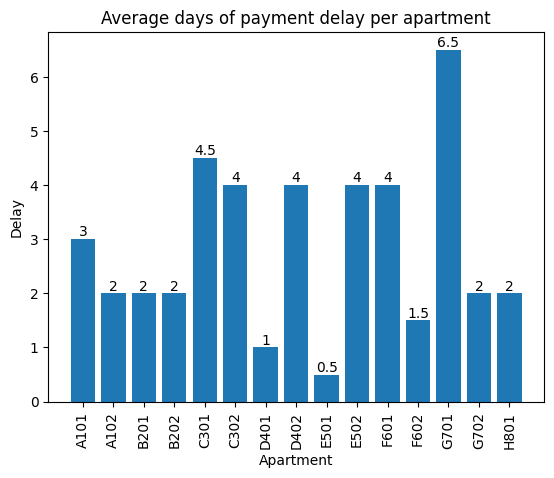

In [322]:
bars = plt.bar(retraso_media['apartamento'], retraso_media['retraso'])
plt.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel('Apartment')
plt.ylabel('Delay')
plt.title('Average days of payment delay per apartment')
plt.show()

In [323]:
data_june = data[(data['datas_combinadas_pagamento'].dt.month == 6) & (data['datas_de_pagamento'].dt.month == 6)].copy().reset_index(drop=True)
data_june

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,retraso
0,A101,2022-06-01,2022-06-05,1000.0,4
1,A102,2022-06-02,2022-06-02,1100.0,0
2,B201,2022-06-03,2022-06-07,1200.0,4
3,B202,2022-06-04,2022-06-07,1300.0,3
4,C301,2022-06-05,2022-06-10,1400.0,5
5,C302,2022-06-06,2022-06-08,1500.0,2
6,D401,2022-06-07,2022-06-07,1600.0,0
7,D402,2022-06-08,2022-06-10,1700.0,2
8,E501,2022-06-09,2022-06-10,1800.0,1
9,E502,2022-06-10,2022-06-16,1900.0,6


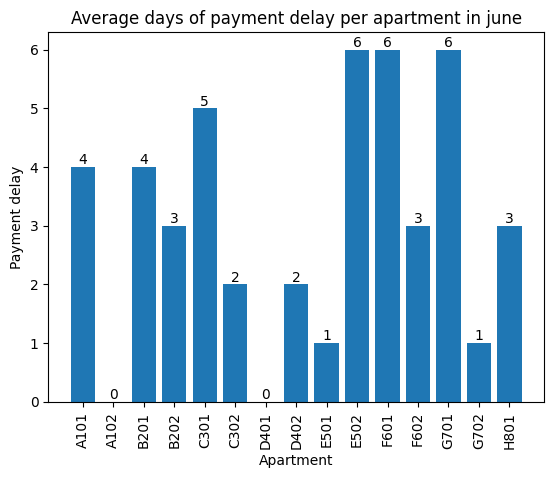

In [324]:
bars = plt.bar(data_june['apartamento'], data_june['retraso'])
plt.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel('Apartment')
plt.ylabel('Payment delay')
plt.title('Average days of payment delay per apartment in june')
plt.show()

In [325]:
data_july = data[(data['datas_combinadas_pagamento'].dt.month == 7) & (data['datas_de_pagamento'].dt.month == 7)].copy().reset_index(drop=True)
data_july

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,retraso
0,A101,2022-07-01,2022-07-03,2500.0,2
1,A102,2022-07-02,2022-07-06,2600.0,4
2,B201,2022-07-03,2022-07-03,2700.0,0
3,B202,2022-07-04,2022-07-05,2800.0,1
4,C301,2022-07-05,2022-07-09,2900.0,4
5,C302,2022-07-06,2022-07-12,1200.0,6
6,D401,2022-07-07,2022-07-09,1300.0,2
7,D402,2022-07-08,2022-07-14,1400.0,6
8,E501,2022-07-09,2022-07-09,1500.0,0
9,E502,2022-07-10,2022-07-12,1600.0,2


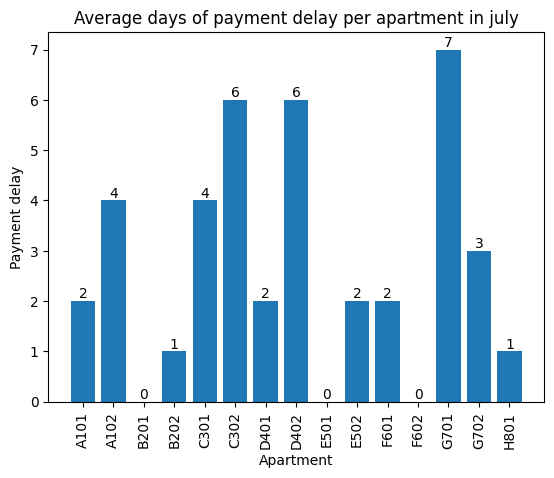

In [326]:
bars = plt.bar(data_july['apartamento'], data_july['retraso'])
plt.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel('Apartment')
plt.ylabel('Payment delay')
plt.title('Average days of payment delay per apartment in july')
plt.show()